#  Super Store Project

## Dataset Columns Explanation
1. **Row ID**
   A unique identifier for each row in the dataset. It helps distinguish records.

2. **Order ID**
   The unique identifier for each order. Multiple rows can share the same order ID if the order contains multiple products.

3. **Order Date**
   The date on which the customer placed the order.

4. **Ship Date**
   The date on which the order was shipped.

5. **Ship Mode**
   The shipping method chosen by the customer (e.g., Standard Class, Second Class, First Class, Same Day).

6. **Customer ID**
   A unique identifier assigned to each customer.

7. **Customer Name**
   The full name of the customer who placed the order.

8. **Segment**
   The type of customer segment (Consumer, Corporate, or Home Office).

9. **Country**
   The country of the customer (in this dataset, it is primarily "United States").

10. **City**
    The city where the customer is located.

11. **State**
    The state where the customer is located.

12. **Postal Code**
    The postal/ZIP code of the customer's location.

13. **Region**
    The geographical region of the order (West, East, Central, or South).

14. **Product ID**
    A unique identifier assigned to each product.

15. **Category**
    The main category of the product (Furniture, Office Supplies, Technology).

16. **Sub-Category**
    The sub-division of the product category (e.g., Chairs, Phones, Binders).

17. **Product Name**
    The detailed name/description of the product.

18. **Sales**
    The total sales value for the product in the given transaction (in USD).

19. **Quantity**
    The number of units of the product sold in the order.

20. **Discount**
    The discount applied to the product (expressed as a fraction, e.g., 0.20 = 20% discount).

21. **Profit**
    The profit gained (or loss if negative) from selling the product in the transaction.


### Questions to be answered in the data set

1- Which product categories and sub-categories contribute most to overall sales and profit?

2- Which customer segments (Consumer, Corporate, Home Office) are the most profitable?
(at both total and average profit per order)

3- How does sales and profit vary across different regions (Central, West, East, South)?
(Identify best and worst-performing regions)

4- Which states and cities generate the highest profit, and which incur the largest losses?

5- What is the relationship between discounts and profitability?

6- Which shipping mode is most frequently used and which is most profitable?
(Compare Standard, Second Class, First Class, Same Day)

7- Which products are the top sellers (by sales volume) and which are the most profitable?
(Identify “star products” and “loss leaders”)

8- How has sales and profit trended over time (by year and month)?
(Seasonal or yearly growth patterns)

9- Which customer(s) bring the highest sales and profit to the company?
(Pareto analysis (top 20% of customers contributing to ~80% of sales))

10- How does order quantity affect profit margin?
(Do large-quantity orders always translate into more profit?)

11-  How does discount impact profitability across different categories and sub-categories?
(Do some categories suffer more from discounts than others?)

In [117]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [118]:
# import data
df = pd.read_csv('SuperStore.csv',encoding = 'utf-16')

In [119]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [120]:
# check Null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

##### no null values

In [121]:
# check duplicates
df.duplicated().sum()

np.int64(0)

##### we have no duplicates

In [122]:
# check data types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [123]:
df['Row ID'] = df['Row ID'].astype(int)

##### we need to change data type of dates

In [124]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d-%m-%Y')
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month']=df['Order Date'].dt.to_period('M')

In [125]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
month                     int32
year                      int32
year_month            period[M]
dtype: object

### Feature Engineering

- shipping Days: to know how much was taken to deliver orders
- Order_Year & Order_Month to do some TimeLine analysis
- COGS : cost of goods sold
- Discount Amount : to know amount of discount exactly
- Selling Price : to know price of each unit

In [126]:
df['Shipping Days'] = df['Ship Date'] - df['Order Date']

In [127]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year,year_month,Shipping Days
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2013,2013-11,3 days
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2013,2013-11,3 days
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2013,2013-06,4 days
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2012,2012-10,7 days
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2012,2012-10,7 days


In [128]:
df['Discount Amount'] = df['Discount'] * df['Sales']

In [129]:
df['COGS'] = df['Sales'] - (df['Discount Amount'] + df['Profit'])
# calculates selling price for the each product
df['selling_price']=(df['Sales'] / df['Quantity']).round(2)

In [130]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,month,year,year_month,Shipping Days,Discount Amount,COGS,selling_price
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,11,2013,2013-11,3 days,0.000000,220.046400,130.98
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,11,2013,2013-11,3 days,0.000000,512.358000,243.98
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,6,2013,2013-06,4 days,0.000000,7.748600,7.31
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,10,2012,2012-10,7 days,430.909875,909.698625,191.52
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,10,2012,2012-10,7 days,4.473600,15.378000,11.18


##### Q1: Which product categories and sub-categories contribute most to overall sales and profit?

In [131]:
df.groupby(["Category",'Sub-Category'])['Sales'].sum().reset_index().sort_values("Sales", ascending=False)

,Category,Sub-Category,Sales
16,Technology,Phones,330007.0540
1,Furniture,Chairs,328449.1030
11,Office Supplies,Storage,223843.6080
3,Furniture,Tables,206965.5320
6,Office Supplies,Binders,203412.7330
15,Technology,Machines,189238.6310
13,Technology,Accessories,167380.3180
14,Technology,Copiers,149528.0300
0,Furniture,Bookcases,114879.9963
4,Office Supplies,Appliances,107532.1610


In [132]:
df.groupby(["Category",'Sub-Category'])['Profit'].sum().reset_index().sort_values("Profit", ascending=False)

,Category,Sub-Category,Profit
14,Technology,Copiers,55617.8249
16,Technology,Phones,44515.7306
13,Technology,Accessories,41936.6357
10,Office Supplies,Paper,34053.5693
6,Office Supplies,Binders,30221.7633
1,Furniture,Chairs,26590.1663
11,Office Supplies,Storage,21278.8264
4,Office Supplies,Appliances,18138.0054
2,Furniture,Furnishings,13059.1436
7,Office Supplies,Envelopes,6964.1767


In [133]:
cat_profit = df.groupby(["Category",'Sub-Category'])['Profit'].sum().reset_index().sort_values("Profit", ascending=False)

In [134]:
cat_sales =df.groupby(["Category",'Sub-Category'])['Sales'].sum().reset_index().sort_values("Sales", ascending=False)

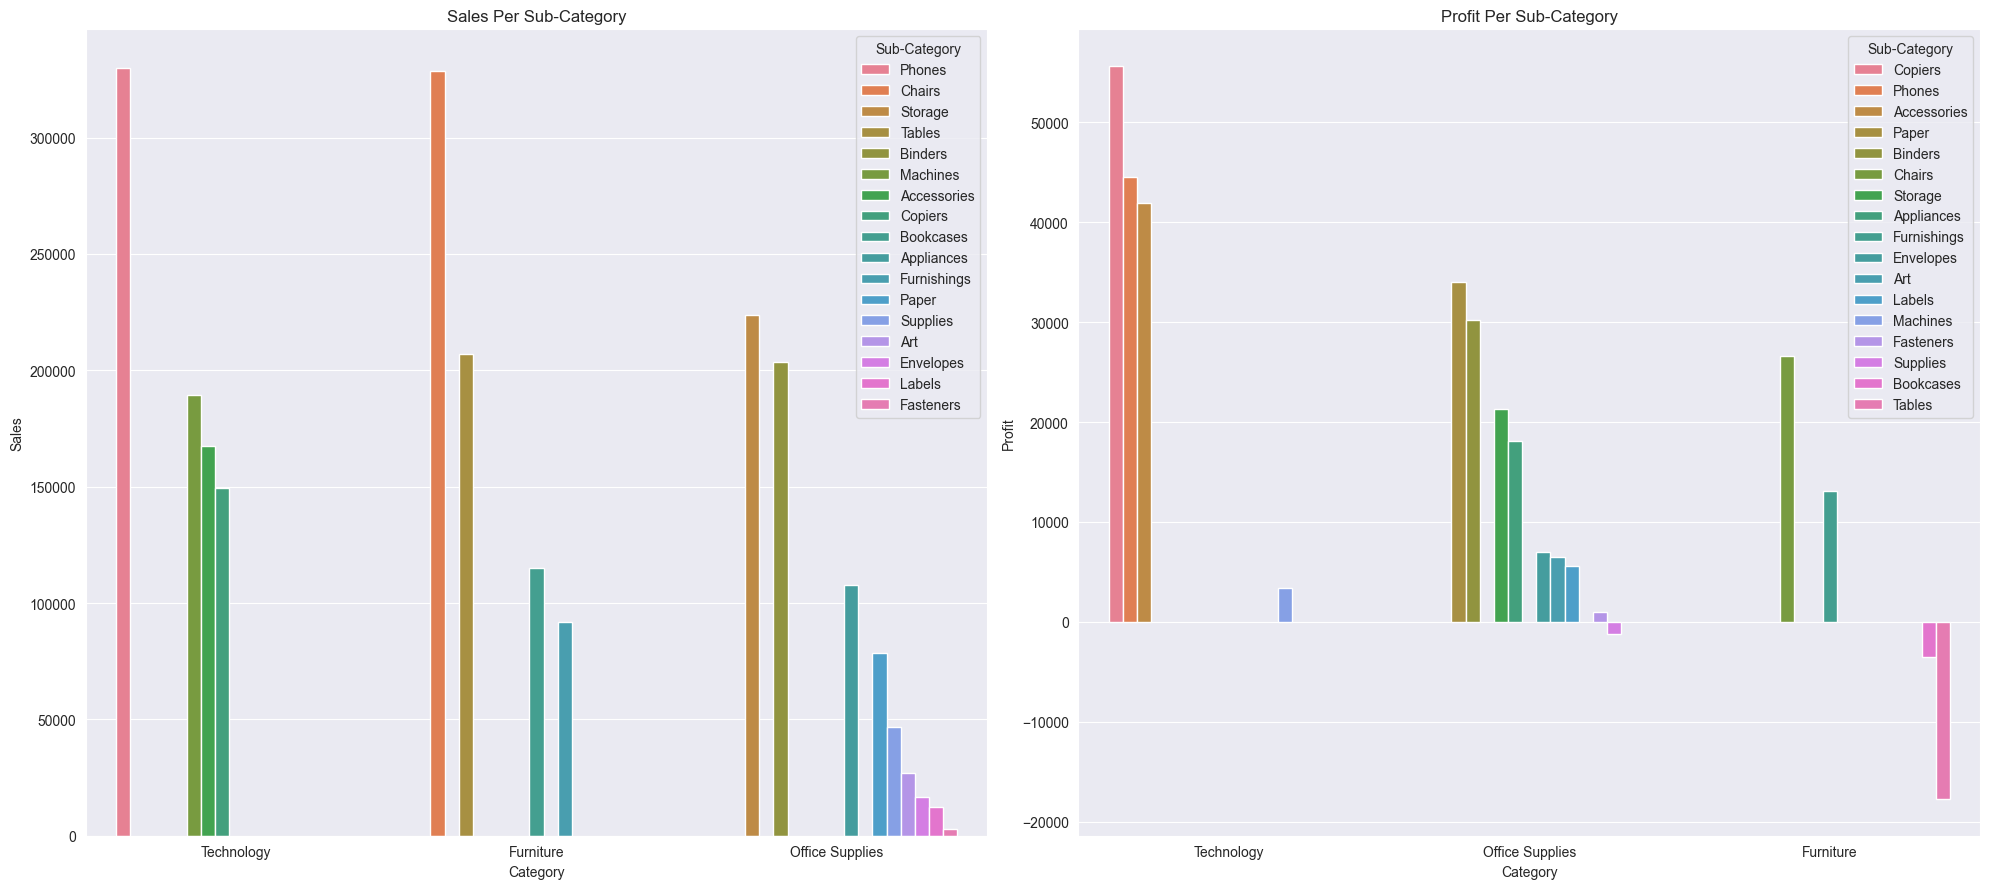

In [135]:
fig,axes = plt.subplots(1,2,figsize=(20,9))
sns.barplot(x="Category",y="Sales",data=cat_sales,ax=axes[0],hue="Sub-Category")
axes[0].set_title("Sales Per Sub-Category")
sns.barplot(x="Category",y="Profit",data=cat_profit,ax=axes[1],hue="Sub-Category")
axes[1].set_title("Profit Per Sub-Category")
plt.tight_layout()
plt.show()

##### (Category Furniture and sub_category Chairs) and (Category Technology and sub_category) Phones has highest Sales , Category Technology and sub_Category Copiers has highest Profit

##### Q2: Which customer segments (Consumer, Corporate, Home Office) are the most profitable?
(at both total and average profit per order)

In [136]:
Segment_total =df.groupby("Segment")['Profit'].sum().reset_index().sort_values("Profit", ascending=False)

In [137]:
Segment_average =df.groupby("Segment")['Profit'].mean().reset_index().sort_values("Profit", ascending=False)

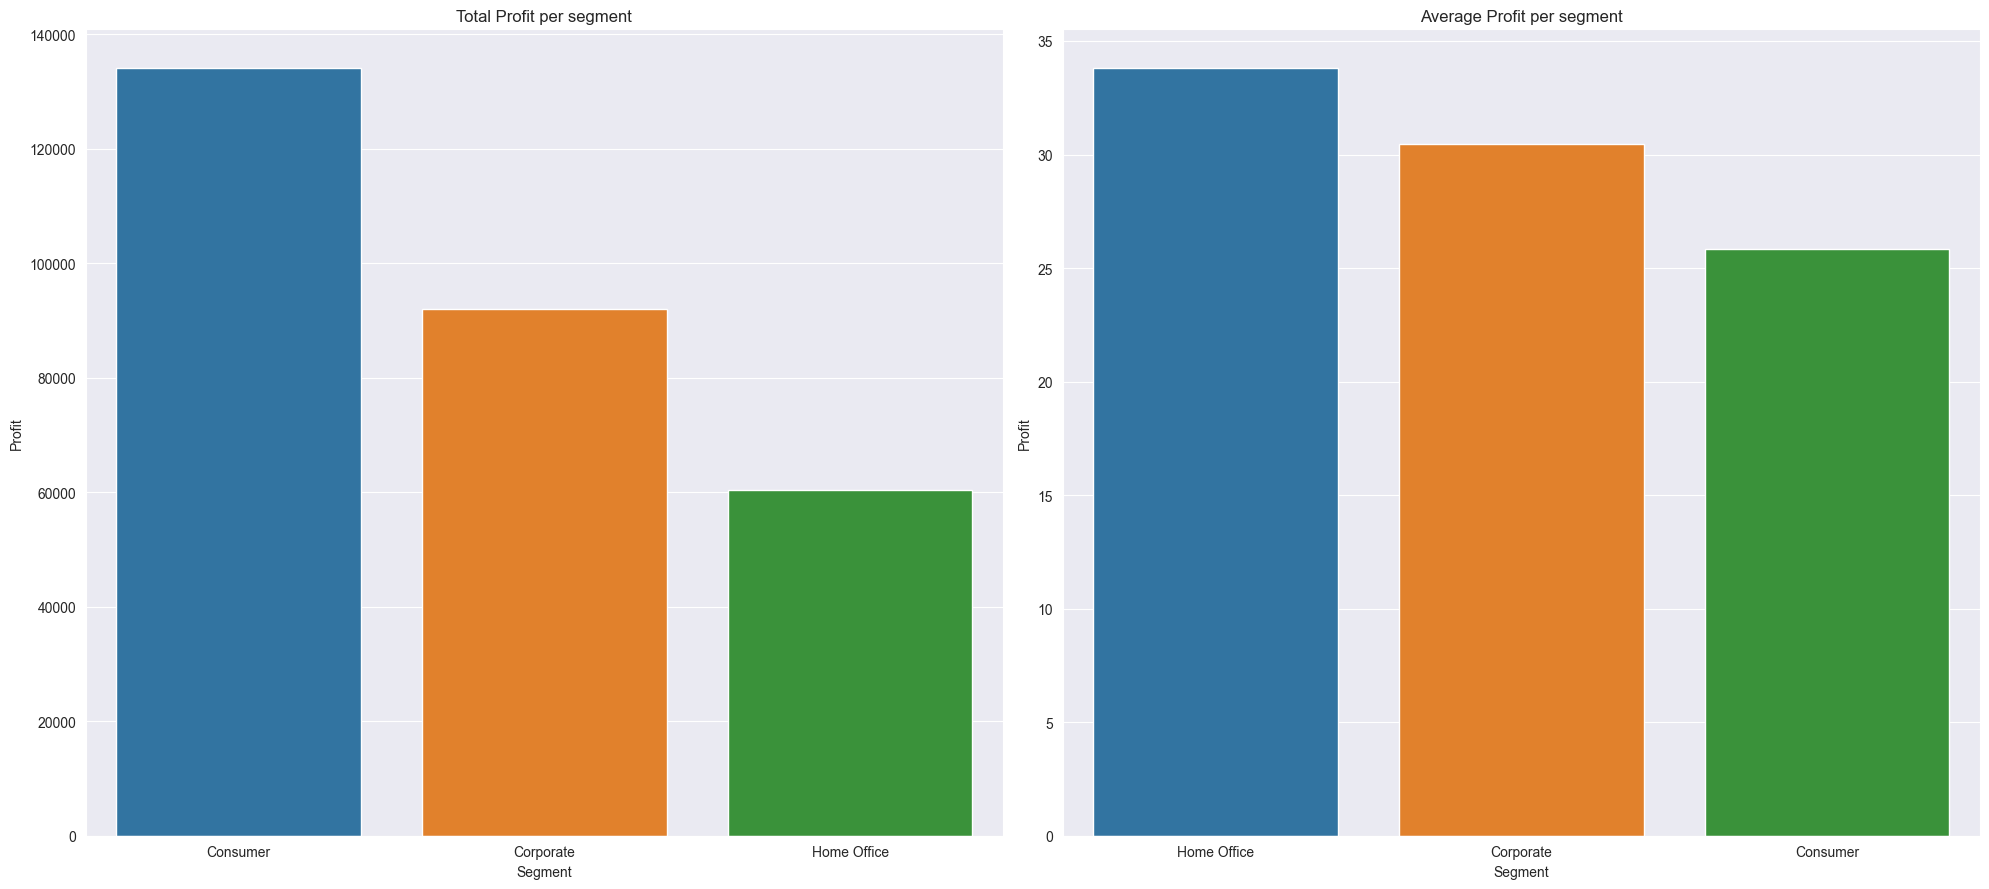

In [185]:
fig,axes = plt.subplots(1,2,figsize=(20,9))
sns.barplot(x="Segment",y="Profit",data=Segment_total,ax=axes[0],hue="Segment")
axes[0].set_title("Total Profit per segment")
sns.barplot(x="Segment",y="Profit",data=Segment_average,ax=axes[1],hue="Segment")
axes[1].set_title("Average Profit per segment")
plt.tight_layout()
plt.show()

##### Consumer has highest total profit , Home Office has highest Average profit

##### Q3: How does sales and profit vary across different regions (Central, West, East, South)?
(Identify best and worst-performing regions)


In [139]:
Region_profit = df.groupby("Region")['Profit'].sum().reset_index().sort_values("Profit", ascending=False)

In [140]:
Region_sales = df.groupby("Region")['Sales'].sum().reset_index().sort_values("Sales", ascending = False)

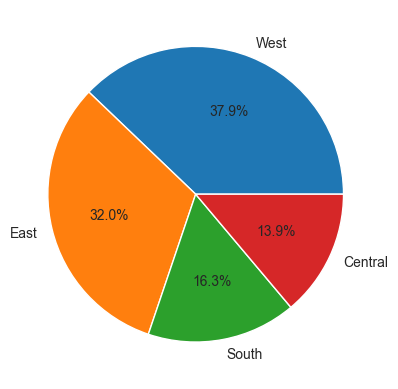

In [141]:
plt.pie(Region_profit["Profit"],
    labels=Region_profit["Region"],  autopct="%.1f%%", )
plt.show()

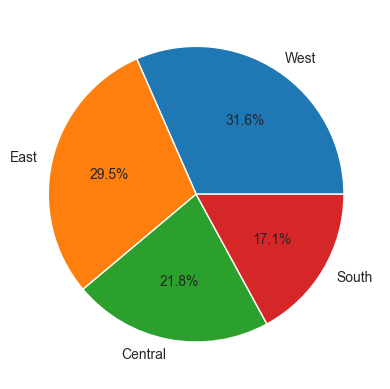

In [142]:
plt.pie(Region_sales["Sales"],
    labels=Region_sales["Region"],  autopct="%.1f%%", )
plt.show()

##### West has highest profit and sales , Central has lowest profit and South has lowest sales

##### Q4: Which states and cities generate the highest profit, and which incur the largest losses?

In [178]:
State_profit = df.groupby("State")['Profit'].sum().reset_index().sort_values("Profit", ascending=False).head(10)

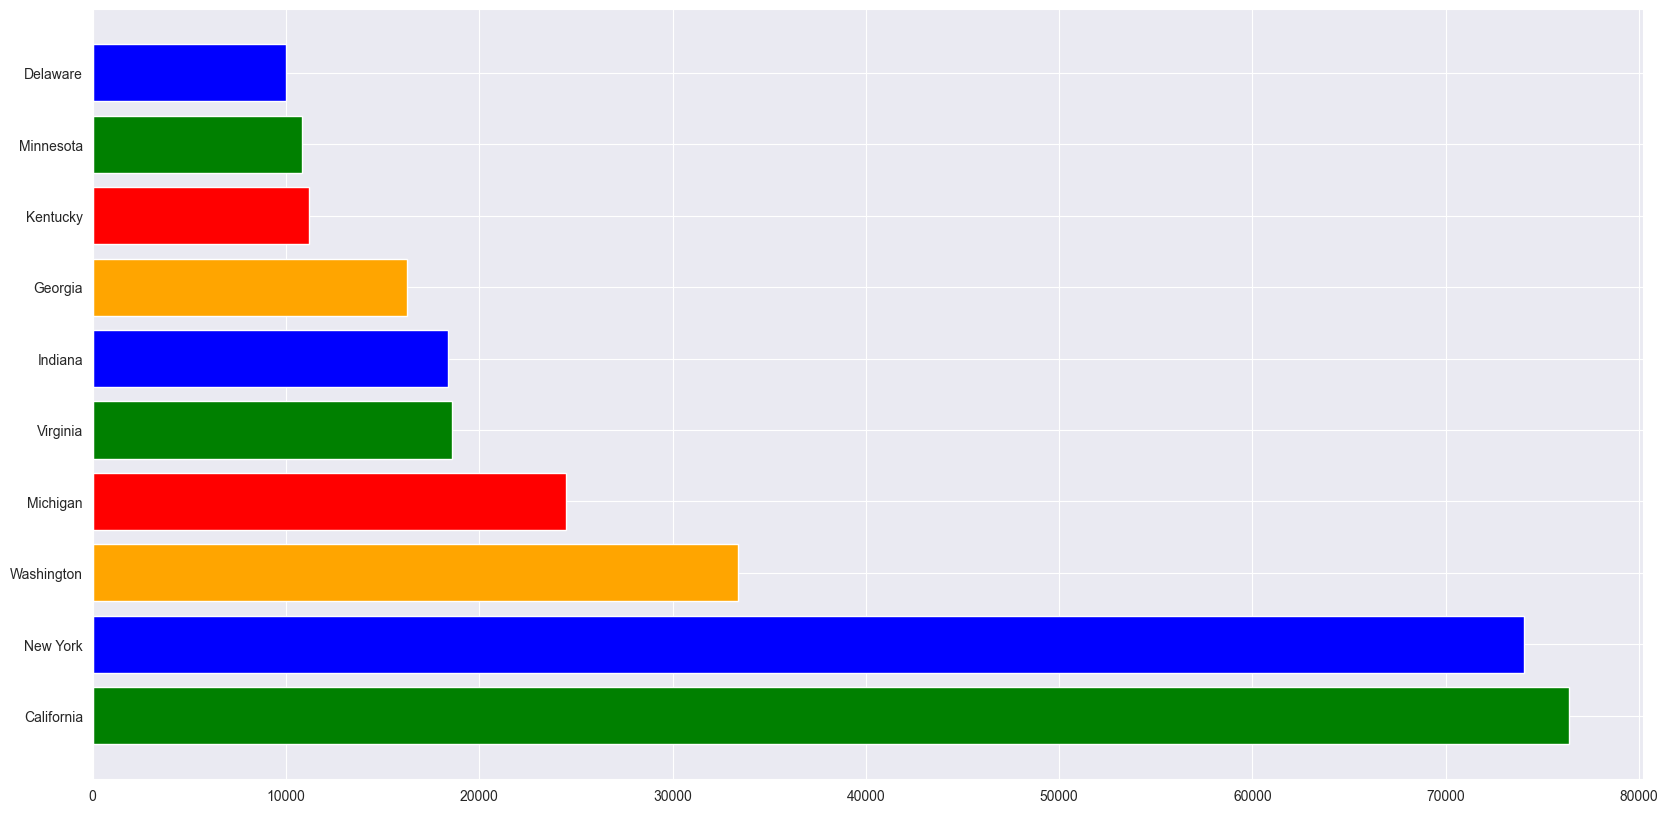

In [180]:
plt.figure(figsize = (20,10))
plt.barh(State_profit['State'],State_profit["Profit"],color=["green","blue","orange","red"])
plt.show()

In [181]:
City_profit = df.groupby("City")['Profit'].sum().reset_index().sort_values("Profit",ascending=False).head(10)

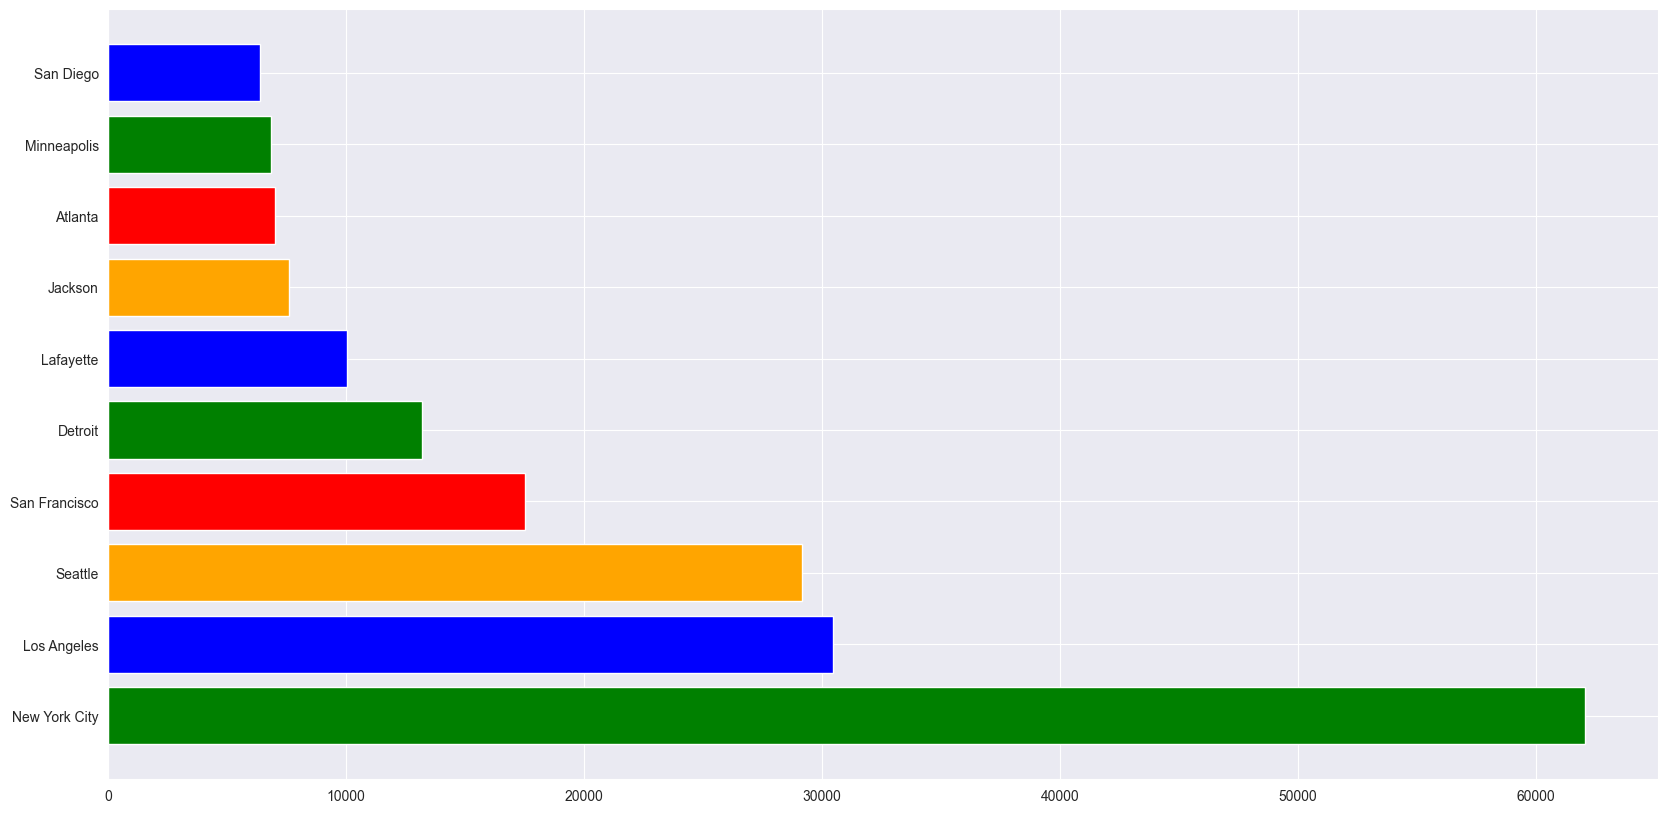

In [184]:
plt.figure(figsize = (20,10))
plt.barh(City_profit['City'],City_profit["Profit"],color=["green","blue","orange","red"])
plt.show()

##### NewYork city has highest profit , Philadelphia has lowest profit, California state has highest profit and Texas has lowest profit

##### Q5: What is the relationship between discounts and profitability?

In [145]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'month',
       'year', 'year_month', 'Shipping Days', 'Discount Amount', 'COGS',
       'selling_price'],
      dtype='object')

In [146]:
df[["Discount", "Profit"]].corr()

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


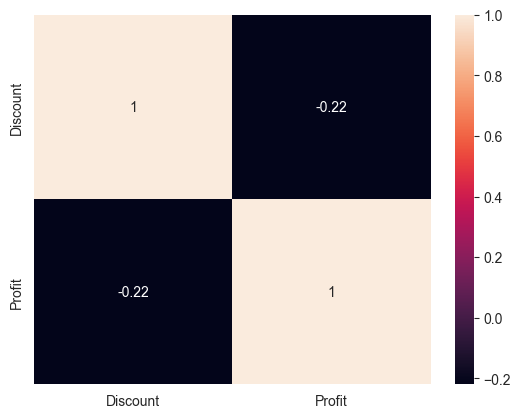

In [187]:
sns.heatmap(df[["Discount", "Profit"]].corr(),annot = True)
plt.show()

 There is a weak negative correlation (-0.21) between Discount and Profit. This means higher discounts slightly reduce profit.


##### Q6: Which shipping mode is most frequently used and which is most profitable?
(Compare Standard, Second Class, First Class, Same Day)

In [147]:
unique_orders = df[["Order ID", "Ship Mode"]].drop_duplicates()
UniqueOrders = unique_orders["Ship Mode"].value_counts().reset_index()

In [148]:
UniqueOrders

,Ship Mode,count
0,Standard Class,2994
1,Second Class,964
2,First Class,787
3,Same Day,264


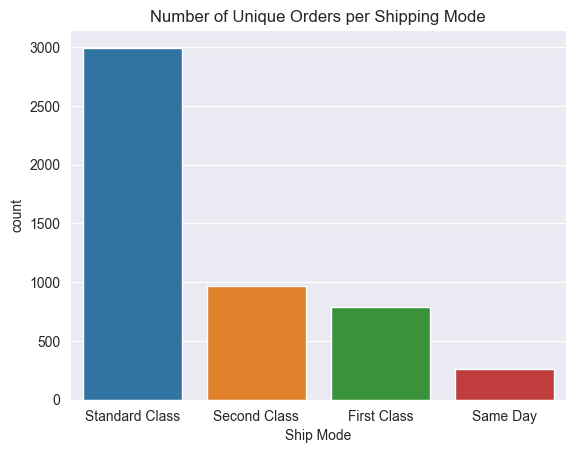

In [188]:
sns.barplot(data = UniqueOrders,x='Ship Mode', y='count', hue="Ship Mode")
plt.title("Number of Unique Orders per Shipping Mode")
plt.show()

##### Standard class is the most frequently used

In [150]:
Ship_Mode_Profit = df.groupby("Ship Mode")['Profit'].sum().reset_index().sort_values("Profit", ascending=False)

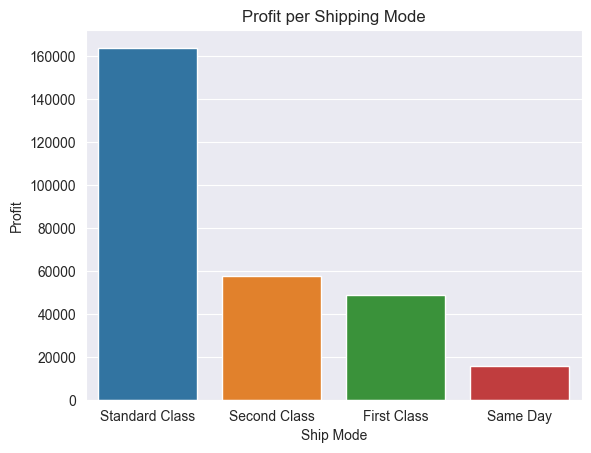

In [189]:
sns.barplot(data = Ship_Mode_Profit,x="Ship Mode", y="Profit", hue="Ship Mode")
plt.title("Profit per Shipping Mode")
plt.show()

##### Standard class is the most profitable ship mode

##### Q7: Which products are the top sellers (by sales volume) and which are the most profitable?
(Identify “star products” and “loss leaders”)

In [190]:
Top_10_products_sales = df.groupby("Product Name")['Sales'].sum().reset_index().sort_values("Sales", ascending=False).head(10)

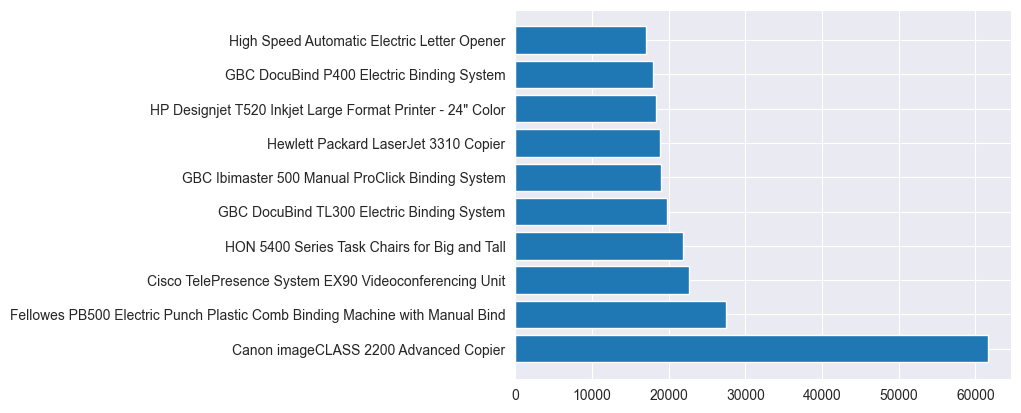

In [191]:
plt.barh(Top_10_products_sales['Product Name'],Top_10_products_sales["Sales"])
plt.show()

In [192]:
Top_10_products_profit=df.groupby("Product Name")['Profit'].sum().reset_index().sort_values("Profit",ascending=False).head(10)

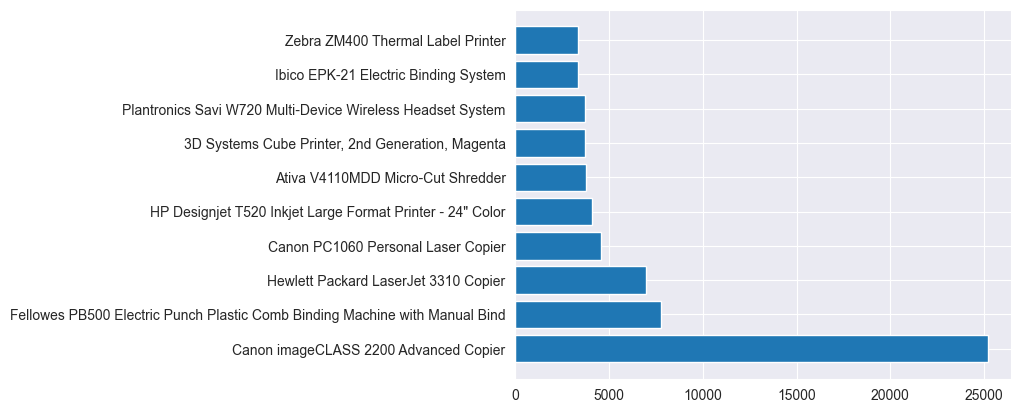

In [193]:
plt.barh(Top_10_products_profit['Product Name'],Top_10_products_profit["Profit"])
plt.show()

### Q7: Top Selling and Most Profitable Products

#### 📊 Top Sellers (by Sales Volume)
- Canon imageCLASS 2200 Advanced Copier → ~61.6K
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine → ~27.4K
- Cisco TelePresence System → ~22.6K
- HON 5400 Series Task Chairs → ~21.8K
- GBC DocuBind TL300 Electric Binding System → ~19.8K
- GBC Ibimaster 500 Manual Binding System → ~19.0K
- Hewlett Packard LaserJet 3310 Copier → ~18.8K
- HP Designjet T520 Inkjet Large Format Printer → ~18.3K
- GBC DocuBind P400 Electric Binding System → ~17.9K
- High Speed Automatic Electric Letter Opener → ~17.0K

#### 💰 Most Profitable Products
- Canon imageCLASS 2200 Advanced Copier → ~25.2K
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine → ~7.8K
- Hewlett Packard LaserJet 3310 Copier → ~6.9K
- Canon PC1060 Personal Copier → ~4.6K
- HP Designjet T520 Inkjet Large Format Printer → ~4.1K
- Ativa V4110MDD Micro-Cut Shredder → ~3.8K
- 3D Systems Cube Printer → ~3.7K
- Plantronics Savi W720 Wireless Headset → ~3.7K
- Ibico EPK-21 Electric Binding System → ~3.3K
- Zebra ZM400 Thermal Label Printer → ~3.3K

---

### 🔑 Insights

- **Star Product(s):**
  - *Canon imageCLASS 2200 Advanced Copier*
    → Appears in both Top Sales and Top Profit lists.
    → Very strong performer; company should ensure stock availability and consider marketing focus.

- **Other Strong Performers:**
  - *Fellowes PB500* and *HP LaserJet 3310 Copier* show high sales and high profit as well.

- **Potential Loss Leaders:**
  - Some products appear in the Top Sales list but **not** in Top Profit (e.g., HON 5400 Series Task Chairs, GBC Ibimaster).
  - These might have **low margins** or be sold at heavy discounts.

- **Business Recommendations:**
  - Increase promotion and availability of **Star Products**.
  - Investigate cost structure / pricing strategy for high-sales but low-profit items.
  - Evaluate whether “loss leaders” are strategically valuable (attracting customers) or just reducing profit.


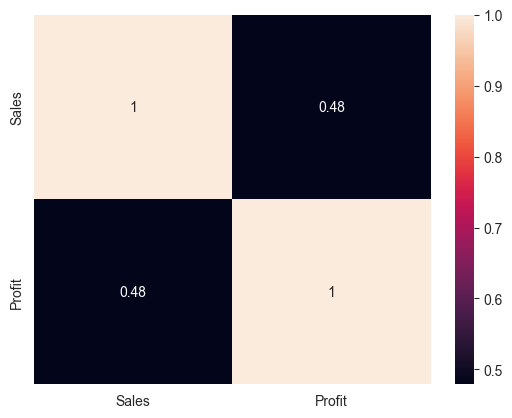

In [154]:
sns.heatmap(df[['Sales','Profit']].corr(),annot=True)
plt.show()

##### Q8: How has sales and profit trended over time (by year and month)?
(Seasonal or yearly growth patterns)

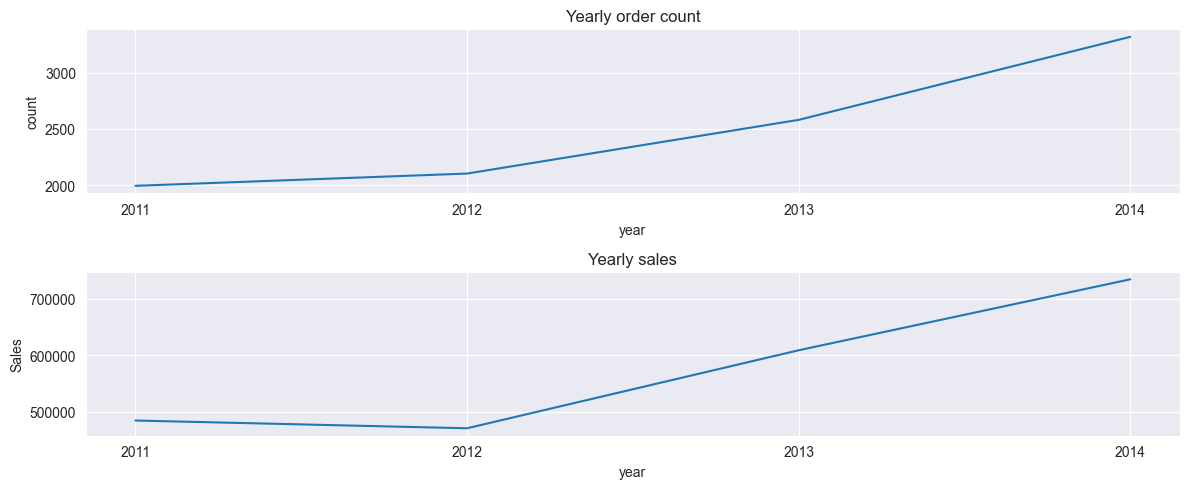

In [155]:
plt.figure(figsize=(12,5))
plt.subplot(211)
df.groupby(['year'])['Order Date'].count().plot()
plt.ylabel('count')
plt.xticks(df.groupby(['year'])['Order Date'].count().index)
plt.title('Yearly order count')
plt.subplot(212)
df.groupby('year')['Sales'].sum().plot()
plt.ylabel('Sales')
plt.xticks(df.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')
plt.tight_layout()
plt.show()

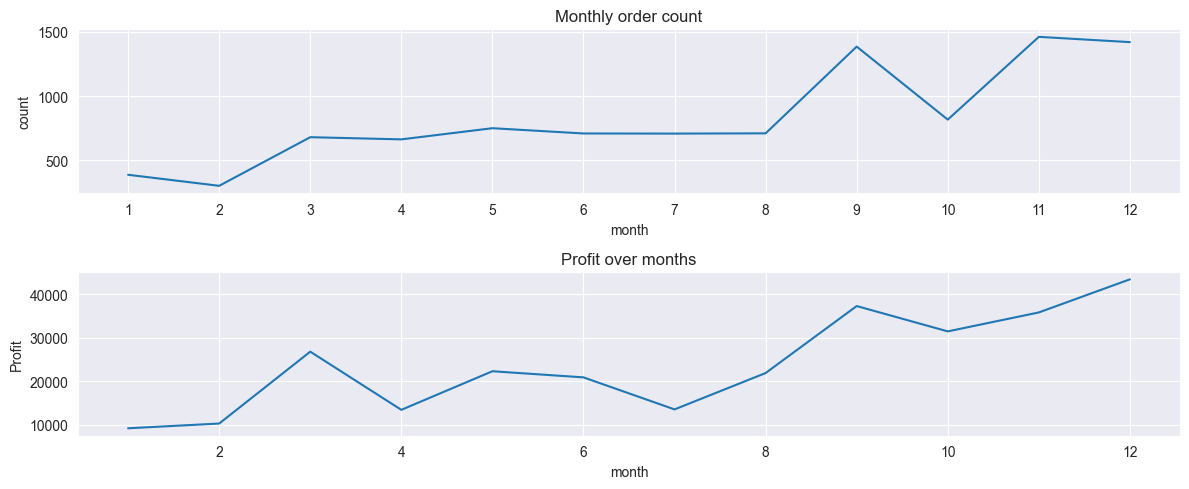

In [156]:
plt.figure(figsize=(12,5))
plt.subplot(211)
df.groupby(['month'])['Order Date'].count().plot()
plt.ylabel('count')
plt.xticks(df.groupby(['month'])['Order Date'].count().index)
plt.title('Monthly order count')
plt.subplot(212)
df.groupby(['month'])['Profit'].sum().plot()
plt.ylabel('Profit')
plt.title("Profit over months")
plt.tight_layout()
plt.show()

##### Q8: hich customer(s) bring the highest sales and profit to the company?
(Pareto analysis (top 20% of customers contributing to ~80% of sales))

In [157]:
sales_by_customer = df.groupby("Customer Name")['Sales'].sum().reset_index().sort_values("Sales", ascending=False)

In [158]:
sales_by_customer

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
...,...,...
656,Roy Skaria,22.328
545,Mitch Gastineau,16.739
123,Carl Jackson,16.520
455,Lela Donovan,5.304


In [159]:
total_sales = sales_by_customer["Sales"].sum()

In [160]:
sales_by_customer["Percent"] = sales_by_customer["Sales"] / total_sales

In [161]:
sales_by_customer["CumPercent"] = sales_by_customer["Percent"].cumsum()

In [162]:
pareto_customers = sales_by_customer[sales_by_customer["CumPercent"] <= 0.8]
print(pareto_customers)

      Customer Name       Sales   Percent  CumPercent
686     Sean Miller  25043.0500  0.010902    0.010902
730    Tamara Chand  19052.2180  0.008294    0.019195
622    Raymond Buch  15117.3390  0.006581    0.025776
757    Tom Ashbrook  14595.6200  0.006354    0.032130
6     Adrian Barton  14473.5710  0.006301    0.038430
..              ...         ...       ...         ...
344    Jamie Frazer   2279.5860  0.000992    0.795646
288     Fred Harton   2271.2840  0.000989    0.796635
176  Craig Carreira   2269.7015  0.000988    0.797623
93      Bobby Elias   2261.4380  0.000984    0.798607
413    Kalyca Meade   2260.9580  0.000984    0.799591

[395 rows x 4 columns]


In [163]:
profit_by_customer = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).reset_index()
total_profit = profit_by_customer["Profit"].sum()
profit_by_customer["Percent"] = profit_by_customer["Profit"] / total_profit
profit_by_customer["CumPercent"] = profit_by_customer["Percent"].cumsum()
pareto_profit_customers = profit_by_customer[profit_by_customer["CumPercent"] <= 0.8]
print(pareto_profit_customers)

         Customer Name     Profit   Percent  CumPercent
0         Tamara Chand  8981.3239  0.031360    0.031360
1         Raymond Buch  6976.0959  0.024358    0.055718
2         Sanjit Chand  5757.4119  0.020103    0.075821
3         Hunter Lopez  5622.4292  0.019632    0.095452
4        Adrian Barton  5444.8055  0.019011    0.114464
..                 ...        ...       ...         ...
147          Rick Reed   721.6826  0.002520    0.789589
148  Alan Schoenberger   719.7751  0.002513    0.792102
149      William Brown   714.3311  0.002494    0.794596
150         Fred Chung   714.2926  0.002494    0.797090
151       Roland Fjeld   711.6168  0.002485    0.799575

[152 rows x 4 columns]


##### Q10: How does order quantity affect profit margin?
(Do large-quantity orders always translate into more profit?)

In [164]:
df['Profit Margin'] = df['Profit'] / df['Sales']

In [165]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,month,year,year_month,Shipping Days,Discount Amount,COGS,selling_price,Profit Margin
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,11,2013,2013-11,3 days,0.000000,220.046400,130.98,0.1600
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,11,2013,2013-11,3 days,0.000000,512.358000,243.98,0.3000
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,6,2013,2013-06,4 days,0.000000,7.748600,7.31,0.4700
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,10,2012,2012-10,7 days,430.909875,909.698625,191.52,-0.4000
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,10,2012,2012-10,7 days,4.473600,15.378000,11.18,0.1125


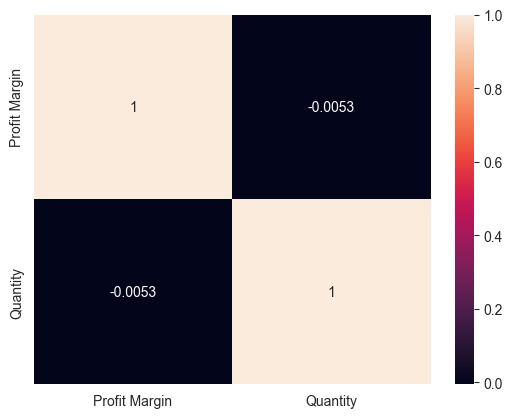

In [166]:
sns.heatmap(df[['Profit Margin','Quantity']].corr(),annot = True)
plt.show()

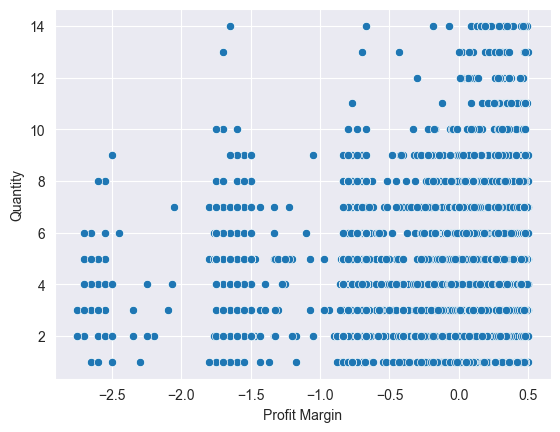

In [167]:
sns.scatterplot(data = df, x = 'Profit Margin', y= 'Quantity')
plt.show()

##### There is no relation between quantity and profit margin

##### Q11: How does discount impact profitability across different categories and sub-categories?
(Do some categories suffer more from discounts than others?)

In [168]:
df.groupby("Category")[["Discount","Profit"]].corr().reset_index()

,Category,level_1,Discount,Profit
0,Furniture,Discount,1.000000,-0.483769
1,Furniture,Profit,-0.483769,1.000000
2,Office Supplies,Discount,1.000000,-0.208787
3,Office Supplies,Profit,-0.208787,1.000000
4,Technology,Discount,1.000000,-0.268853
5,Technology,Profit,-0.268853,1.000000


In [169]:
df.groupby("Sub-Category")[["Discount","Profit"]].corr().reset_index()

,Sub-Category,level_1,Discount,Profit
0,Accessories,Discount,1.000000,-0.244192
1,Accessories,Profit,-0.244192,1.000000
2,Appliances,Discount,1.000000,-0.495198
3,Appliances,Profit,-0.495198,1.000000
4,Art,Discount,1.000000,-0.251636
5,Art,Profit,-0.251636,1.000000
6,Binders,Discount,1.000000,-0.238195
7,Binders,Profit,-0.238195,1.000000
8,Bookcases,Discount,1.000000,-0.607067
9,Bookcases,Profit,-0.607067,1.000000


##### as discount increases Furniture category is the largest category that their profits are decreasing (with correlation -0.49)

##### as discount increases Tables sub-category is the largest sub-category that their profits are decreasing (with correlation -0.67)

##### from what we see discount affects all categories and sub-categories in a negative way